This notebook performs exploratory data analysis on state to state migration flow data obtained from US census (http://www.census.gov/data/tables/time-series/demo/geographic-mobility/state-to-state-migration.html). In this analysis, data from 2005 t0 2015 was used. However, approaches and visualization developed here could be used for analysis migration data in years before 2004.  

Some questions that I would like to address using EDA are
    1. What are the states that have higher net flux of pleople flow?
    2. Which state to state flows rank high on the list?
    3. What distribution does state to state migration flow follow?
    4. is there any correlation between migratory distance (distance between state centriods) 
       and number of migrating people?. Correlation with other quantities such as average 
       temperature, median house price, number of educational institution, GDP per capita
       growth rate etc.
    5. How do the answers to above questions vary year over year, over last decade
    
Above all, the idea behind this exploratory data analysis is to be able to explore trends, patterns and ask more pointed questions

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, stdev, variance
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from matplotlib.collections import PatchCollection
def plot_States_netflux(State_dict, countmin, countmax):
# Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
    #fig, ax = plt.subplots()
    #fig = plt.figure()
    #ax1 = fig.add_subplot(111)
    colors={}
    statenames=[]
    patches=[]
    colors_list=[]
    cmap1 = plt.cm.seismic # use 'Greens' colormap
    vmin = countmin; vmax = countmax # set range.
    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = State_dict[statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap1(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    
    for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
            # Offset Alaska and Hawaii to the lower-left corner. 
            if statenames[nshape] == 'Alaska':
            # Alaska is too big. Scale it down to 35% first, then transate it. 
                seg = list(map(lambda xy: (0.35*xy[0] + 1100000, 0.35*xy[1]-1500000), seg))
            if statenames[nshape] == 'Hawaii':
                seg = list(map(lambda xy: (xy[0] + 5100000, xy[1]-1300000), seg))
            color = rgb2hex(colors[statenames[nshape]]) 
            colors_list.append(color)
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            patches.append(poly)
            ax.add_patch(poly)
    plt.title('Filling State Polygons by Normalized Net Poulation Gain')
    #patches collection is a scalermappable
    p = PatchCollection(patches, cmap=cmap1)
    p.set_array(np.array(colors_list))
    #plt.colorbar(p)
    plt.show()

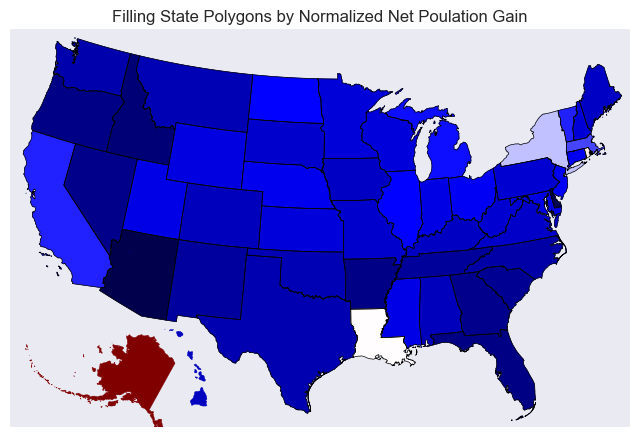

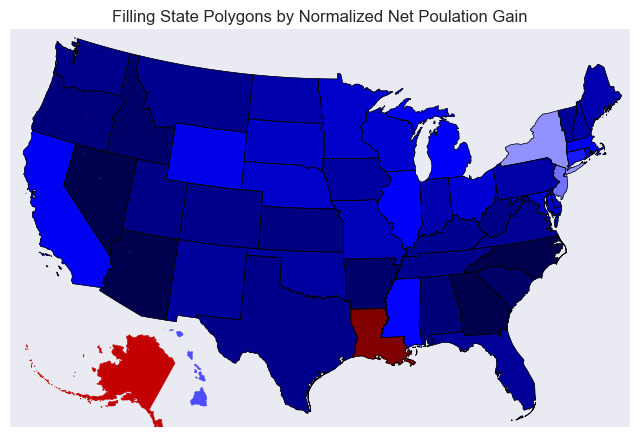

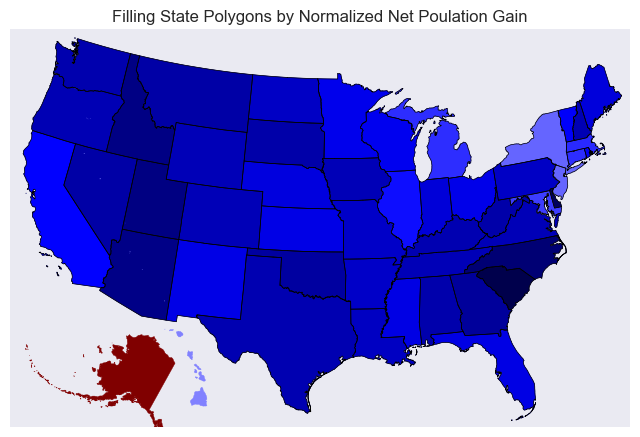

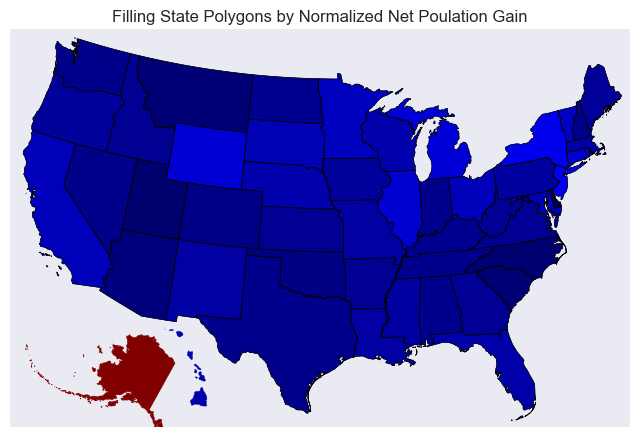

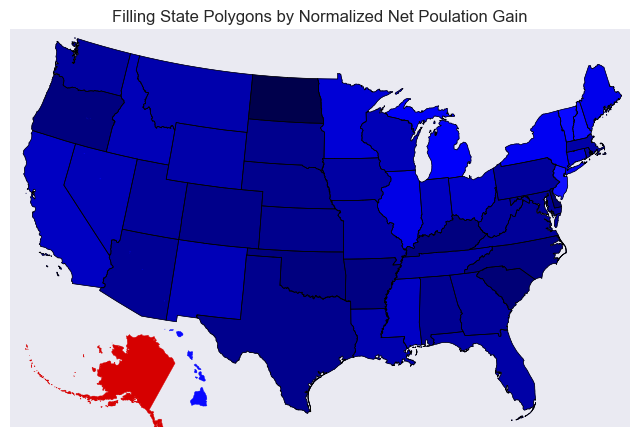

                     2005                   2006                   2007  \
0              California               New York             California   
1                New York             California               New York   
2               Louisiana              Louisiana               Michigan   
3                Illinois             New Jersey             New Jersey   
4                Michigan               Illinois               Illinois   
5           Massachusetts               Michigan               Maryland   
6                    Ohio            Puerto Rico          Massachusetts   
7                  Alaska          Massachusetts            Puerto Rico   
8              New Jersey                   Ohio                 Alaska   
9            Rhode Island                 Alaska                Florida   
10  District of Columbia             Connecticut                   Ohio   
11            Puerto Rico            Mississippi            Connecticut   
12                Indiana

In [26]:
#NON NORMALIZED VERSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, stdev, variance
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
df_sts_top10 = pd.DataFrame()
df_counts_top10=pd.DataFrame()
df_inflow_sl=pd.DataFrame()
df_outflow_sl=pd.DataFrame()
df_netflow_sl=pd.DataFrame()
df_inflow_counts=pd.DataFrame()
df_outflow_counts=pd.DataFrame()
df_netflow_counts=pd.DataFrame()
skiprows2005=[0,1,2,3,4,5,6,7,8,14,20,26,32,38,44,45,46,47,48,54,60,66,72,75,76,77]
skiprows2008=[0,1,2,3,4,5,6,7,8,14,20,26,32,38,44,45,46,47,48,54,60,66,72,75,76,77,78]
parsecols_2005="A,B,D,F,H,J,M,O,Q,S,U,X,Z,AB,AD,AF,AI,AK,AM,AO,AQ,AT,AV,AX,AZ,BB,BE,BG,BI,BK,BM,BP,BR,BT,BV,BX,CA,CC,CE,CG,CI,CL,CN,CP,CR,CT,CW,CY,DA,DC,DE,DH,DJ"
for year in range(2005,2010):
    if year<=2007:
        df=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2005,parse_cols="A,B,D",names=['col1','col2'])
        col_names=list(df.index)
        df_mdata=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2005,parse_cols=parsecols_2005,names=col_names)
    else:
        df=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2008,parse_cols="A,B,D",names=['col1','col2'])
        col_names=list(df.index)
        df_mdata=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2008,parse_cols=parsecols_2005,names=col_names)
    dict_statepop={}    
    for item in col_names:
        dict_statepop[item]=df_mdata.loc[item,item]
        df_mdata.loc[item,item]=0
    
    df_mdata_T=df_mdata.T # for getting influx by summing cols
    ############# 
    # get central tendency measures for inflow and outflow of state_to_state 
    # get total inflow , outflow and netflow for a given state
    #############
    outflow_stats=df_mdata.describe()
    inflow_stats=df_mdata_T.describe()
    outflow=df_mdata.sum()
    inflow=df_mdata_T.sum()
    state_list=outflow.index
    outflow_counts=outflow.values
    inflow_counts=inflow.values
    netflow_counts=inflow_counts-outflow_counts
    ######
    # generate heat maps
    #ax = sns.heatmap(df_mdata)
    # turn the axis label
    #for item in ax.get_yticklabels():
        #item.set_rotation(0)
    #for item in ax.get_xticklabels():
        #item.set_rotation(90)
    # save figure
    #plt.savefig('State_to_State_Migration_'+str(year-1)+'_'+str(year)+'.png', dpi=600)
    #plt.show()
    ######
    # unstack the dataframes to get list of state to state flows
    df_unstack=df_mdata.unstack()
    state_to_state=list(df_unstack.index)
    counts=list(df_unstack.values)
    # sort state to state flow data and append to year-to-year data frame
    counts, state_to_state = zip(*sorted(zip(counts, state_to_state)))
    data_sts=pd.DataFrame(list(state_to_state[2693:]))
    data_sts.columns=['from_'+str(year), 'to_'+str(year)]
    df_sts_top10=df_sts_top10.append(data_sts.T)
    data_counts=pd.DataFrame(list(counts[2693:]))
    data_counts.columns=[str(year)]
    df_counts_top10=df_counts_top10.append(data_counts.T)
    # sort state outflow and append to year-to-year data frame
    outflow_counts,statelist_outflow=zip(*sorted(zip(outflow_counts, state_list)))
    data_of_sl=pd.DataFrame(list(statelist_outflow))
    data_of_sl.columns=[str(year)]
    data_of_counts=pd.DataFrame(list(outflow_counts))
    data_of_counts.columns=[str(year)]
    df_outflow_sl=df_outflow_sl.append(data_of_sl.T)
    df_outflow_counts=df_outflow_counts.append(data_of_counts.T)
    # sort state inflow and append to year-to-year data frame
    inflow_counts,statelist_inflow=zip(*sorted(zip(inflow_counts, state_list)))
    data_if_sl=pd.DataFrame(list(statelist_inflow))
    data_if_sl.columns=[str(year)]
    data_if_counts=pd.DataFrame(list(inflow_counts))
    data_if_counts.columns=[str(year)]
    df_inflow_sl=df_inflow_sl.append(data_if_sl.T)
    df_inflow_counts=df_inflow_counts.append(data_if_counts.T)
    # sort state netflow and append to year-to-year data frame
    netflow_counts,statelist_netflow=zip(*sorted(zip(netflow_counts, state_list)))
    data_nf_sl=pd.DataFrame(list(statelist_netflow))
    data_nf_sl.columns=[str(year)]
    data_nf_counts=pd.DataFrame(list(netflow_counts))
    #plot_States_netflux(list(statelist_netflow),list(netflow_counts))
    netflow_counts_norm=list(netflow_counts)
    statelist_netflow_norm=list(statelist_netflow)
    for ii in range(0,len(statelist_netflow_norm)):
        netflow_counts_norm[ii]=100*netflow_counts_norm[ii]/dict_statepop[statelist_netflow_norm[ii]]
    netflow_counts_norm,statelist_netflow_norm=zip(*sorted(zip(netflow_counts_norm,statelist_netflow_norm)))
    statelist_netflow_norm=list(statelist_netflow_norm)
    netflow_counts_norm=list(netflow_counts_norm)
    State_dict={}
    for ii in range(0,len(statelist_netflow_norm)):
        State_dict[statelist_netflow_norm[ii]]=netflow_counts_norm[ii]
    plot_States_netflux(State_dict,netflow_counts_norm[0],netflow_counts_norm[len(statelist_netflow_norm)-1])
    data_nf_counts.columns=[str(year)]
    df_netflow_sl=df_netflow_sl.append(data_nf_sl.T)
    df_netflow_counts=df_netflow_counts.append(data_nf_counts.T)
df_sts_top10=df_sts_top10.T
df_counts_top10=df_counts_top10.T
df_outflow_sl=df_outflow_sl.T
df_outflow_counts=df_outflow_counts.T
df_inflow_sl=df_inflow_sl.T
df_inflow_counts=df_inflow_counts.T
df_netflow_sl=df_netflow_sl.T
df_netflow_counts=df_netflow_counts.T
print(df_netflow_sl)
print(df_netflow_counts)

In [165]:
#Normalized State to State flows 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, stdev, variance
df_sts_top10 = pd.DataFrame()
df_counts_top10=pd.DataFrame()
skiprows2005=[0,1,2,3,4,5,6,7,8,14,20,26,32,38,44,45,46,47,48,54,60,66,72,75,76,77]
skiprows2008=[0,1,2,3,4,5,6,7,8,14,20,26,32,38,44,45,46,47,48,54,60,66,72,75,76,77,78]
parsecols_2005="A,B,D,F,H,J,M,O,Q,S,U,X,Z,AB,AD,AF,AI,AK,AM,AO,AQ,AT,AV,AX,AZ,BB,BE,BG,BI,BK,BM,BP,BR,BT,BV,BX,CA,CC,CE,CG,CI,CL,CN,CP,CR,CT,CW,CY,DA,DC,DE,DH,DJ"
for year in range(2005,2010):
    if year<=2007:
        df=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2005,parse_cols="A,B,D",names=['col1','col2'])
        col_names=list(df.index)
        df_mdata=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2005,parse_cols=parsecols_2005,names=col_names)
    else:
        df=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2008,parse_cols="A,B,D",names=['col1','col2'])
        col_names=list(df.index)
        df_mdata=pd.read_excel('Census_Migration_data/state_to_state_migrations_table_'+str(year)+'.xls',header=None,index_col=0,skiprows=skiprows2008,parse_cols=parsecols_2005,names=col_names)
    for item1 in col_names:
        for item2 in col_names:
            if item1 != item2:
                df_mdata.loc[item2,item1]=df_mdata.loc[item2,item1]/df_mdata.loc[item1,item1]
    for item in col_names:
        df_mdata.loc[item,item]=0
    
    ax = sns.heatmap(df_mdata)

    # turn the axis label
    for item in ax.get_yticklabels():
        item.set_rotation(0)

    for item in ax.get_xticklabels():
        item.set_rotation(90)

    df_unstack=df_mdata.unstack()
    # save figure
    plt.savefig('State_to_State_Migration_'+str(year-1)+'_'+str(year)+'_scaled.png', dpi=600)
    #plt.show()
    state_to_state=list(df_unstack.index)
    counts=list(df_unstack.values)
    counts, state_to_state = zip(*sorted(zip(counts, state_to_state)))
    data_sts=pd.DataFrame(list(state_to_state[2693:]))
    df_sts_top10=df_sts_top10.append(data_sts.T)
    data_counts=pd.DataFrame(list(counts[2693:]))
    df_counts_top10=df_counts_top10.append(data_counts.T)
df_sts_top10=df_sts_top10.T
df_counts_top10=df_counts_top10.T
print(df_sts_top10)
print(df_counts_top10)

                        0              1                      0  \
0                  Nevada     California          New Hampshire   
1                Delaware   Pennsylvania                Vermont   
2                  Alaska     Washington                 Nevada   
3            Rhode Island  Massachusetts            Puerto Rico   
4                  Hawaii     California           Rhode Island   
5                 Wyoming       Colorado           North Dakota   
6           New Hampshire  Massachusetts                Wyoming   
7            North Dakota      Minnesota                 Hawaii   
8               Louisiana          Texas              Louisiana   
9   District of Columbia        Virginia  District of Columbia    
10  District of Columbia        Maryland  District of Columbia    

                1                      0              1  \
0   Massachusetts               Delaware       Maryland   
1        New York                 Nevada     California   
2      California 